<a href="https://colab.research.google.com/github/AndrewCrossman/PHYS824/blob/main/Phys824_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conductance and Shot Noise of Pseudodiffusive and Diffusive Electron Transport Through Graphene Nanoribbons
### © Andrew Crossman, University of Delaware
[PHYS824: Nanophysics & Nanotechnology](https://wiki.physics.udel.edu/phys824) 

In [21]:
pip install kwant

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
# Imports
import numpy as np
import kwant 
from kwant.builder import HoppingKind 
from numpy.random import rand
from functools import reduce
import scipy.linalg as la
import math
from math import sqrt
from numpy import arange
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# If using Google Colab Include
from google.colab import files

## Test Code

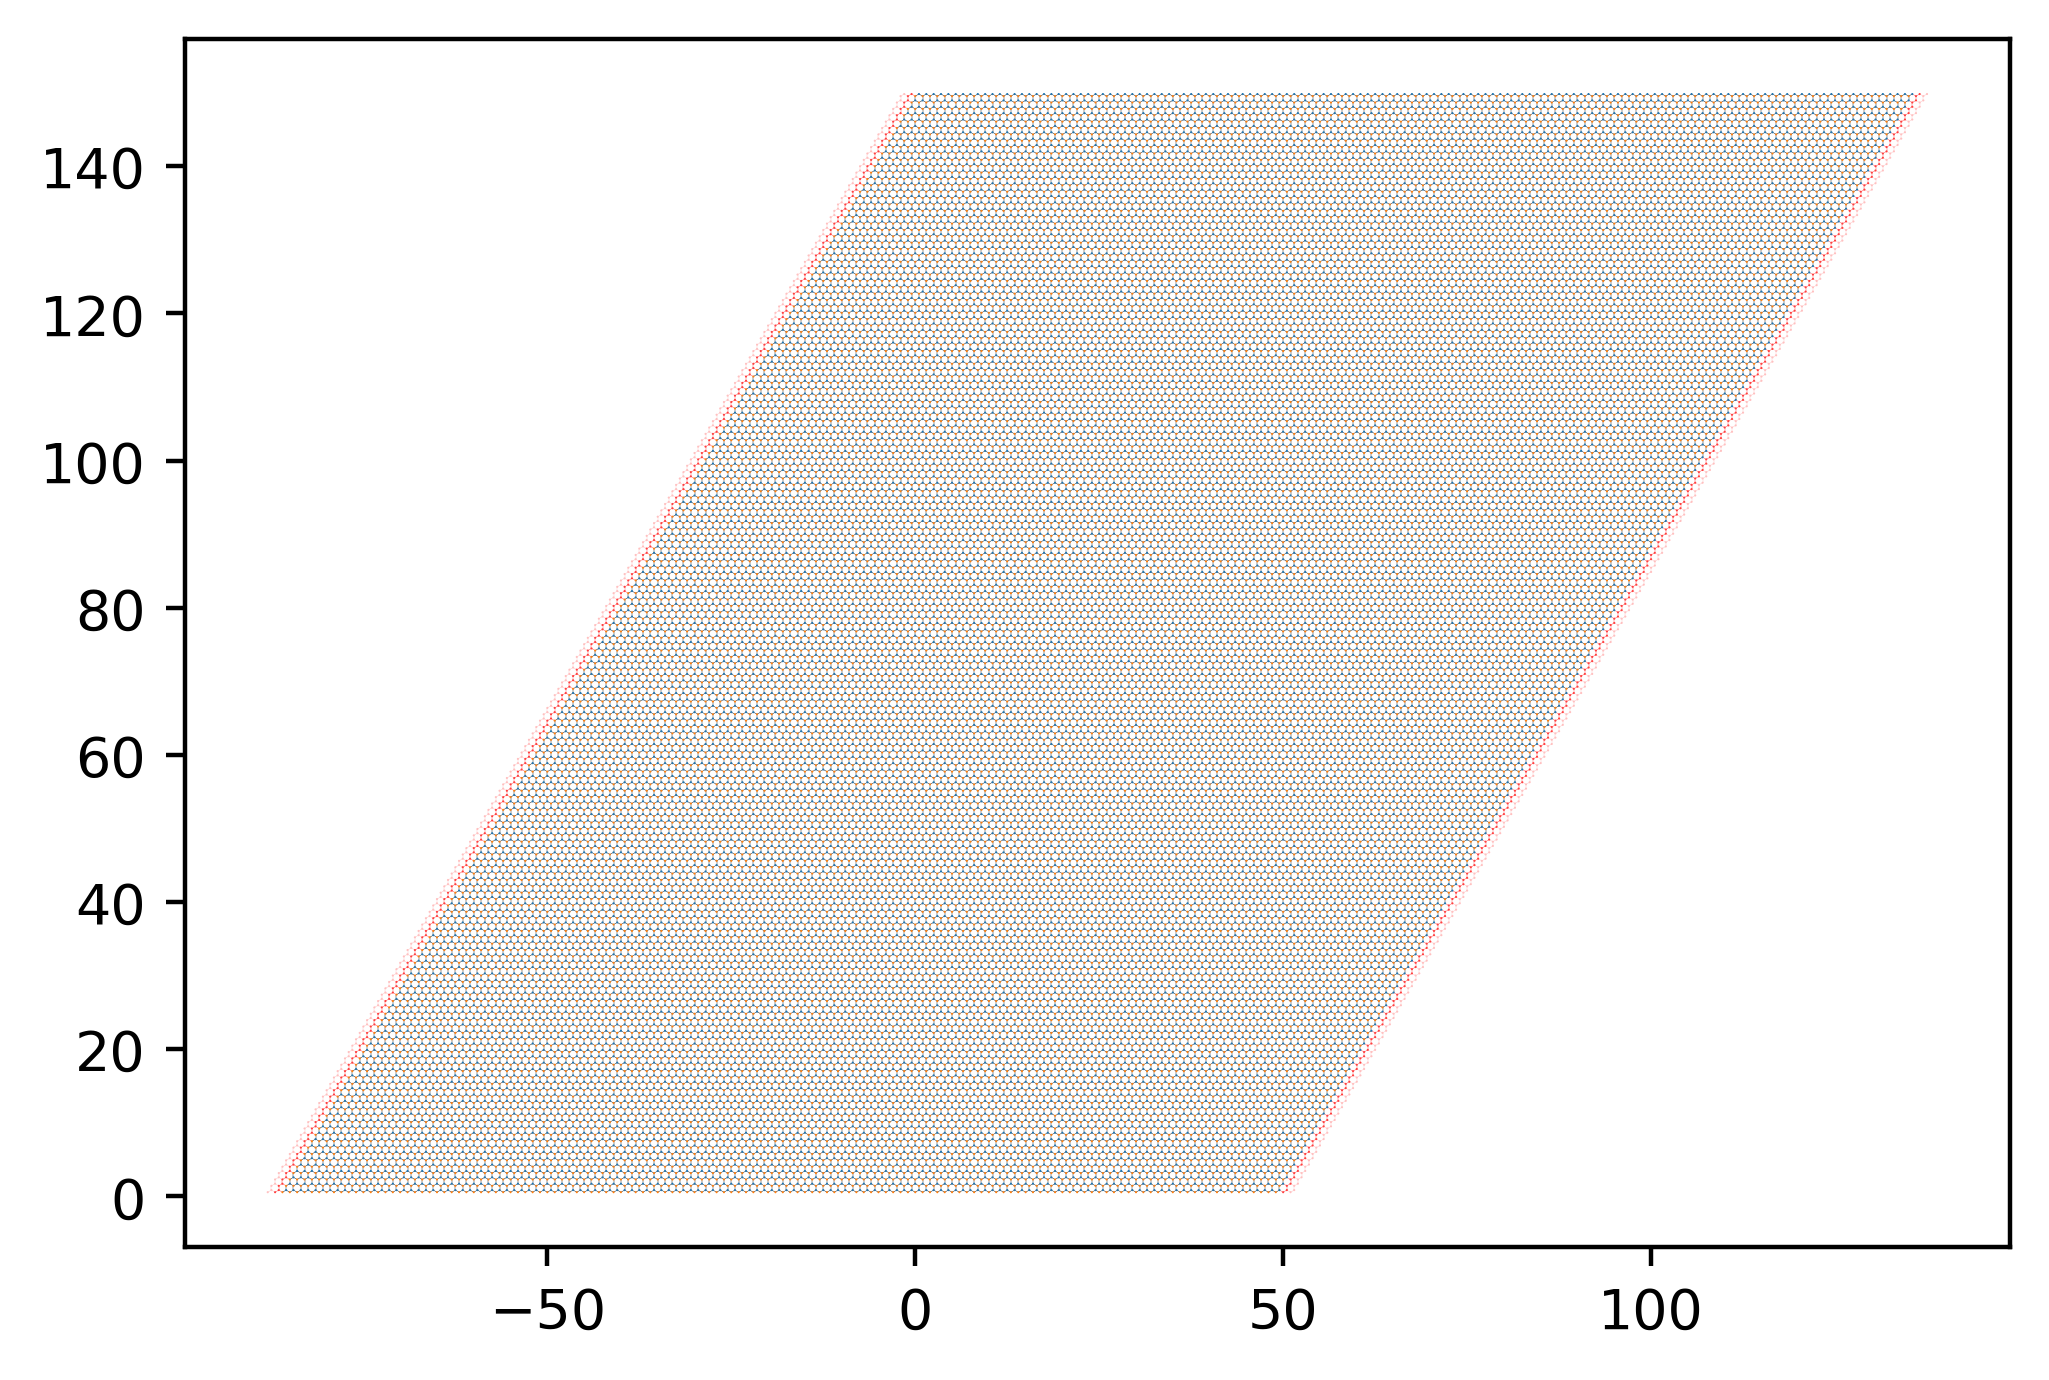

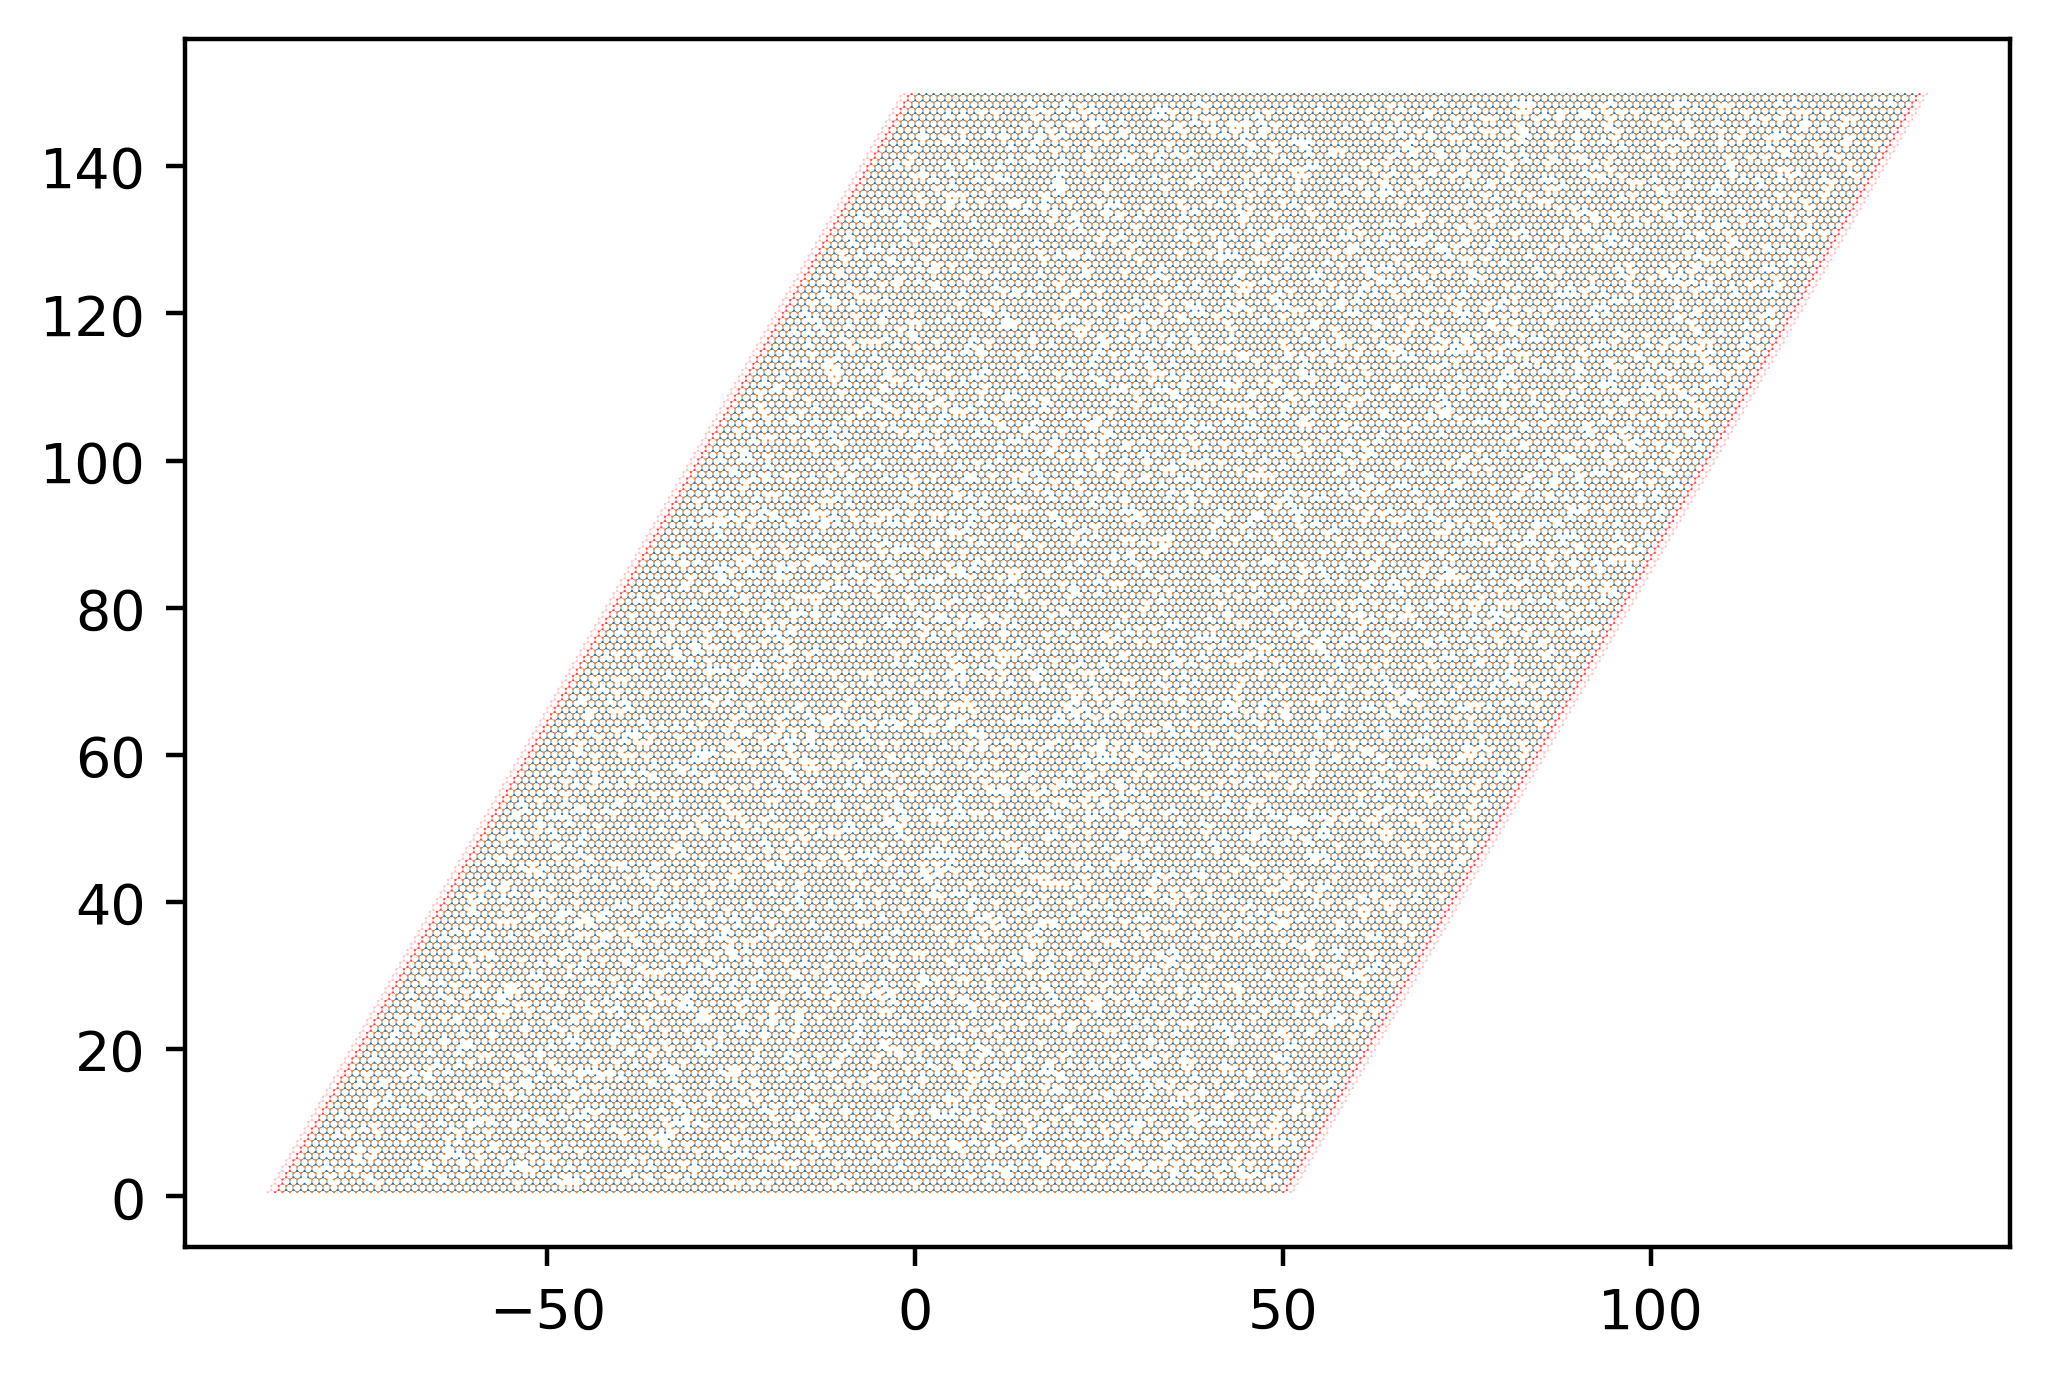

In [24]:
length = 50
width = 150
length_min = -int(np.tan(30*np.pi/180)*width)+2
length_max = int(length)-2
width_min = 2
width_max = int(width/np.cos(30*np.pi/180))-2
graphene = kwant.lattice.general([(1,0),(1/2,sqrt(3)/2)], [(0,0),(0,1/sqrt(3))])
a,b = graphene.sublattices
sys = kwant.Builder()
sys[graphene.shape((lambda pos: 0<=pos[0]<length and 0<pos[1]<width), (0, 0))] = 0
sys[graphene.neighbors(1)] = -1
# Make leads
left_direction = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
left_lead = kwant.Builder(left_direction)
left_lead[graphene.shape( (lambda pos: 0<pos[1]<width), (0, 0))] = 0.0
left_lead[graphene.neighbors()] = -1
# Attach leads
sys.attach_lead(left_lead)
sys.attach_lead(left_lead.reversed())
# Plot System
kwant.plot(sys, dpi=400);
# Remove vac % of sites from Central Region
num_sites = len(sys.finalized().sites)
h=0
tries = 0
while h<num_sites*.1:
  if tries>num_sites*.1*3:
      break
  try:
    tries = tries + 1
    i = random.randint(length_min,length_max)
    j = random.randint(width_min,width_max)
    del sys[a(i,j)]
    h=h+1
  except KeyError:
    continue
  #except ValueError:
  #  continue
  try:
    tries = tries + 1
    i = random.randint(length_min,length_max)
    j = random.randint(width_min,width_max)
    del sys[b(i,j)]
    h=h+1
  except KeyError:
    continue
  except ValueError:
    continue
  # Finalize system
sys = sys.finalized()
  # Plot ZGNR Image
kwant.plot(sys, dpi=400);


## Part I: Semi-infinite ZGNR with Leads

Define function to compute conductance, conductivity, and fanofactor of ZGNR with a given width, length, 1st NN hopping, gate voltage, and energy.

In [25]:
def Q1(width, length, t, gate, energy):
  graphene = kwant.lattice.general([(1,0),(1/2,sqrt(3)/2)], [(0,0),(0,1/sqrt(3))])
  a,b = graphene.sublattices
  sys = kwant.Builder()
  sys[graphene.shape((lambda pos: 0<=pos[0]<length and 0<pos[1]<width), (0, 0))] = gate
  sys[graphene.neighbors(1)] = t
  # Make leads
  left_direction = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
  left_lead = kwant.Builder(left_direction)
  left_lead[graphene.shape( (lambda pos: 0<pos[1]<width), (0, 0))] = 0.0
  left_lead[graphene.neighbors()] = t
  # Attach leads
  sys.attach_lead(left_lead)
  sys.attach_lead(left_lead.reversed())
  kwant.plot(sys, dpi=100);
  # Finalize systems
  sys = sys.finalized()
  left_lead = left_lead.finalized()
  # Solve Scattering Matrix
  smatrix = kwant.smatrix(sys, energy) 
  tmat = smatrix.submatrix(1, 0) # transmission from lead 0->1
  tt = np.dot(tmat, tmat.conj().T)
  evals = np.linalg.eigvals(tt)
  num = 0
  den = 0
  for x in evals:
    den = den + x
    num = num + x*(1-x)
  conductance = den.real # from lead 0->1
  conductivity = conductance * length/width
  fanofactor = (num/den).real
  shot_noise = num.real # formula from wikipedia
  return conductance, conductivity, fanofactor, shot_noise

Find and plot the conductances, conductivities, and fanofactors for a variety of widths and lengths with t=-3, gate voltage = .5eV and energy=.505eV. (Reproduce Fig. 5)

50.5 5.0


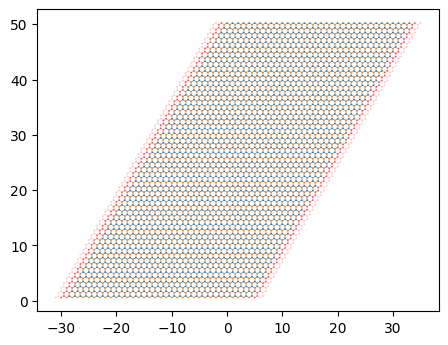

50.5 10.0


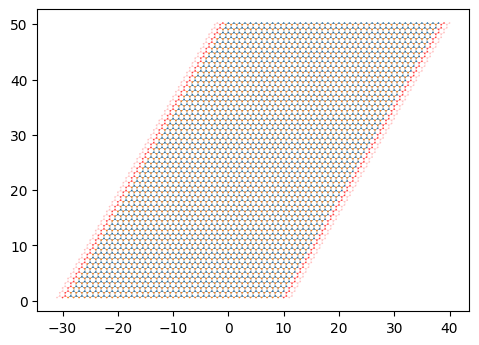

50.5 15.0


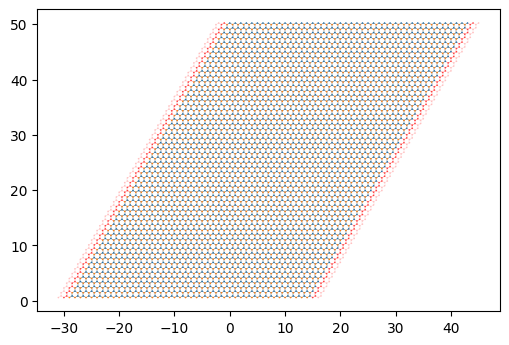

50.5 20.0


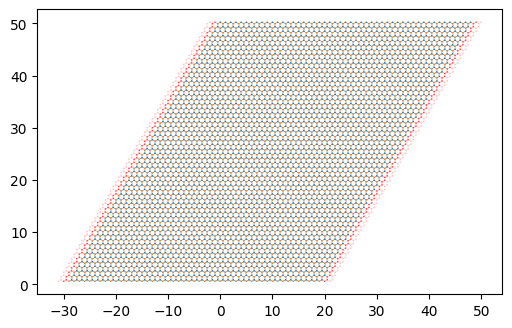

50.5 25.0


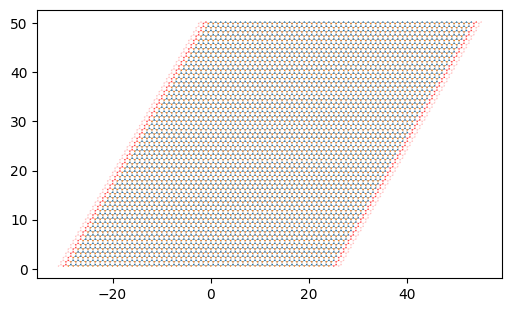

50.5 30.0


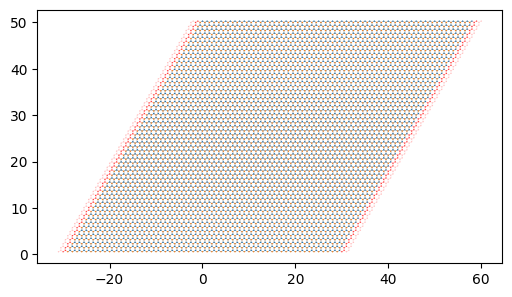

50.5 35.0


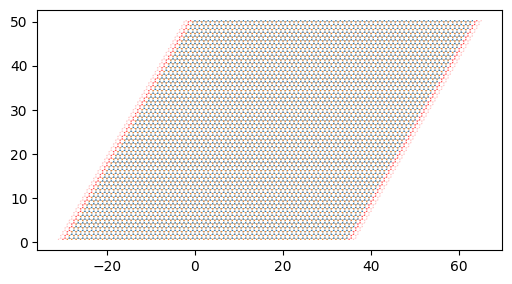

50.5 40.0


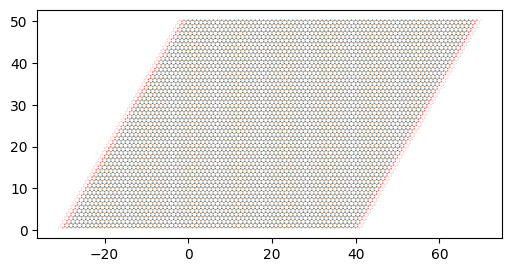

50.5 45.0


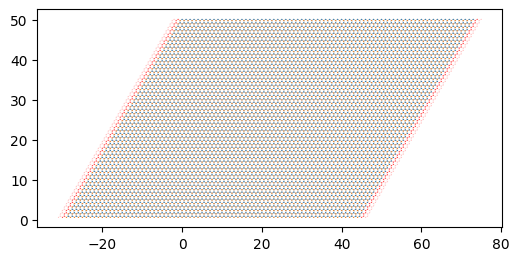

50.5 50.0


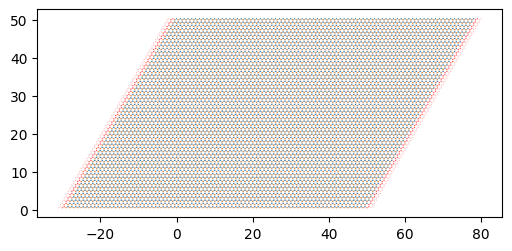

50.5 55.0


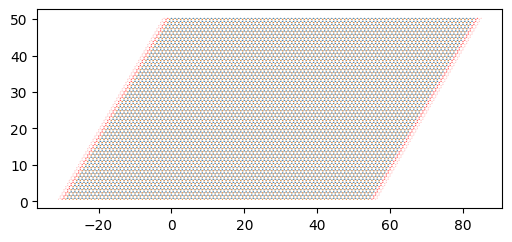

50.5 60.0


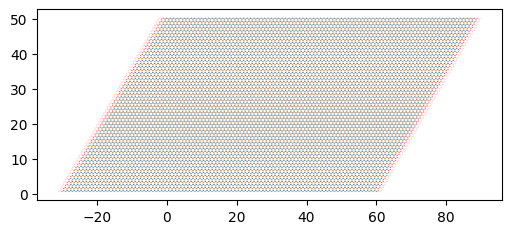

50.5 65.0


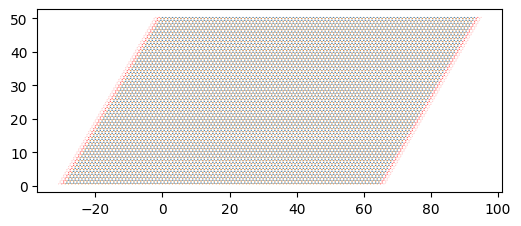

50.5 70.0


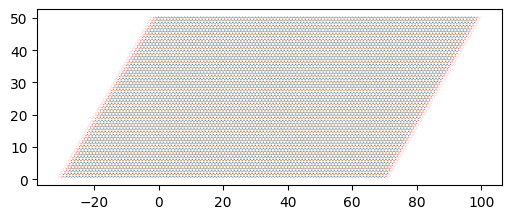

50.5 75.0


In [ ]:
Widths = [50.5,100.5,150,200.5,250.5]
Lengths = np.linspace(5, 150, num=30, endpoint=True)
conductances = {}
conductivities = {}
fanofactors = {}
shot_noises = {}

t0 = -3
gate0 = 0.5
energy0 = 0.505

for W in Widths:
  Gs = []
  cs = []
  ffs = []
  sns = []
  for L in Lengths:
    print(W,L)
    a = Q1(W, L, t0, gate0, energy0)
    Gs.append(a[0])
    cs.append(a[1])
    ffs.append(a[2])
    sns.append(a[3])
  conductances[W] = Gs
  conductivities[W] = cs
  fanofactors[W] = ffs
  shot_noises[W] = sns

fig1, ax1 = plt.subplots(dpi=400, figsize=(6,4))
fig2, ax2 = plt.subplots(dpi=400, figsize=(6,4))
fig3, ax3 = plt.subplots(dpi=400, figsize=(6,4))
fig4, ax4 = plt.subplots(dpi=400, figsize=(6,4))
for key in conductances.keys():
  ax1.plot(Lengths, conductances[key], label='W'+str(key))
  ax2.plot(Lengths, conductivities[key], label='W'+str(key))
  ax3.plot(Lengths, fanofactors[key], label='W'+str(key))
  ax4.plot(Lengths, shot_noises[key], label='W'+str(key))

ax1.set_title('Conductances', fontsize=14, fontweight='bold')
ax1.set_xlabel(r'L $(\AA)$', fontsize=14, fontweight='bold')
ax1.set_ylabel(r'G ($\frac{2e^2}{h}$)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=14)
ax1.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig1.savefig('Conductances_Q1_5.png')
files.download('Conductances_Q1_5.png')

ax2.set_title('Conductivities', fontsize=14, fontweight='bold')
ax2.set_xlabel(r'L $(\AA)$', fontsize=14, fontweight='bold')
ax2.set_ylabel(r'$\sigma$ ($\frac{2e^2}{h}$)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=14)
ax2.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig2.savefig('Conductivities_Q1_5.png')
files.download('Conductivities_Q1_5.png')

ax3.set_title('Fano Factors', fontsize=14, fontweight='bold')
ax3.set_xlabel(r'L $(\AA)$', fontsize=14, fontweight='bold')
ax3.set_ylabel(r'F', fontsize=14, fontweight='bold')
ax3.legend(fontsize=14)
ax3.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig3.savefig('Fanofactors_Q1_5.png')
files.download('Fanofactors_Q1_5.png')

ax4.set_title('Shot Noises', fontsize=14, fontweight='bold')
ax4.set_xlabel(r'L $(\AA)$', fontsize=14, fontweight='bold')
ax4.set_ylabel(r'Shot Noise ($\frac{4e^3}{h}$)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=14)
ax4.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig4.savefig('Shot_Noises_Q1_5.png')
files.download('Shot_Noises_Q1_5.png')

Find and plot the conductances, conductivities, and fanofactors for a variety of widths and lengths with t=-3, gate voltage = .5eV and energy=.501eV. (Reproduce Fig. 6)

In [ ]:
Widths = [50.5,100.5,150,200.5,250.5]
L_over_W =  np.linspace(.05, 1, num=30, endpoint=True)
conductances = {}
conductivities = {}
fanofactors = {}
shot_noises = {}

t0 = -3
gate0 = 0.5
energy0 = 0.501

for W in Widths:
  Gs = []
  cs = []
  ffs = []
  sns = []
  Lengths = np.linspace(.05*W, 1*W, num=30, endpoint=True)
  for L in Lengths:
    print(W,L)
    a = Q1(W, L, t0, gate0, energy0)
    Gs.append(a[0])
    cs.append(a[1])
    ffs.append(a[2])
    sns.append(a[3])
  conductances[W] = Gs
  conductivities[W] = cs
  fanofactors[W] = ffs
  shot_noises[W] = sns

fig1, ax1 = plt.subplots(dpi=400, figsize=(6,4))
fig2, ax2 = plt.subplots(dpi=400, figsize=(6,4))
fig3, ax3 = plt.subplots(dpi=400, figsize=(6,4))
fig4, ax4 = plt.subplots(dpi=400, figsize=(6,4))
for key in conductances.keys():
  ax1.plot(L_over_W, conductances[key], label='W'+str(key))
  ax2.plot(L_over_W, conductivities[key], label='W'+str(key))
  ax3.plot(L_over_W, fanofactors[key], label='W'+str(key))
  ax4.plot(L_over_W, shot_noises[key], label='W'+str(key))

ax1.set_title('Conductances', fontsize=14, fontweight='bold')
ax1.set_xlabel(r'L/W', fontsize=14, fontweight='bold')
ax1.set_ylabel(r'G ($\frac{2e^2}{h}$)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=14)
ax1.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig1.savefig('Conductances_Q1_6.png')
files.download('Conductances_Q1_6.png')

ax2.set_title('Conductivities', fontsize=14, fontweight='bold')
ax2.set_xlabel(r'L/W', fontsize=14, fontweight='bold')
ax2.set_ylabel(r'$\sigma$ ($\frac{2e^2}{h}$)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=14)
ax2.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig2.savefig('Conductivities_Q1_6.png')
files.download('Conductivities_Q1_6.png')

ax3.set_title('Fano Factors', fontsize=14, fontweight='bold')
ax3.set_xlabel(r'L/W', fontsize=14, fontweight='bold')
ax3.set_ylabel(r'F', fontsize=14, fontweight='bold')
ax3.legend(fontsize=14)
ax3.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig3.savefig('Fanofactors_Q1_6.png')
files.download('Fanofactors_Q1_6.png')

ax4.set_title('Shot Noises', fontsize=14, fontweight='bold')
ax4.set_xlabel(r'L/W', fontsize=14, fontweight='bold')
ax4.set_ylabel(r'Shot Noise ($\frac{4e^3}{h}$)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=14)
ax4.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig4.savefig('Shot_Noises_Q1_6.png')
files.download('Shot_Noises_Q1_6.png')

# Part II: Diffusive transport and localization in ZGNRs with vacancies

In [ ]:
def make_disordered_system(length, width, vac, iterations, t, gate, energy):
  # Get Graphene Nanoribbon lattice parameters
  graphene = kwant.lattice.general([(1,0),(1/2,sqrt(3)/2)], [(0,0),(0,1/sqrt(3))])
  a,b = graphene.sublattices
  # Create min and max boundaries to creat vacancies
  length_min = -int(np.tan(30*np.pi/180)*width)+1
  length_max = int(length)-2
  width_min = 2
  width_max = int(width/np.cos(30*np.pi/180))-2
  # Create initial geometric average values to return
  geo_conductance = 1
  geo_conductivity = 1
  geo_fanofactor = 1
  geo_shot_noise = 1
  ### START ITERATIVE WHILE LOOP ###
  reps = 0
  while reps < iterations:
    # Make ZGNR
    sys = kwant.Builder()
    sys[graphene.shape((lambda pos: 0<=pos[0]<length and 0<pos[1]<width), (0, 0))] = 0.0
    sys[graphene.neighbors(1)] = t
    # Make leads
    left_direction = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    left_lead = kwant.Builder(left_direction)
    left_lead[graphene.shape( (lambda pos: 0<pos[1]<width), (0, 0))] = 0.0
    left_lead[graphene.neighbors()] = t
    # Attach leads
    sys.attach_lead(left_lead)
    sys.attach_lead(left_lead.reversed())
    # Plot System
    kwant.plot(sys, dpi=100);
    # Create vacancies in Central Region
    num_sites = len(sys.finalized().sites)
    h=0
    tries = 0
    while h<num_sites*vac:
      if num_sites*vac*3<tries:
          break
      try:
        tries = tries + 1
        i = random.randint(length_min, length_max)
        j = random.randint(width_min, width_max)
        del sys[a(i,j)]
        h=h+1
      except KeyError:
        continue
      except ValueError:
        continue
      try:
        tries = tries + 1
        i = random.randint(length_min, length_max)
        j = random.randint(width_min, width_max)
        del sys[b(i,j)]
        h=h+1
      except KeyError:
        continue
      except ValueError:
        continue
    # Finalize system
    sys = sys.finalized()
    # Plot ZGNR Image
    kwant.plot(sys, dpi=100);
    # Solve Scattering Matrix
    smatrix = kwant.smatrix(sys, energy) 
    tmat = smatrix.submatrix(1, 0) # transmission from lead 0->1
    tt = np.dot(tmat, tmat.conj().T)
    evals = np.linalg.eigvals(tt)
    # Initialize parameters needed to calculate system quantities
    num = 0
    den = 0
    conductance = 0
    conductivity = 0
    fanofactor = 0
    shot_noise = 0
    # Calculate system quantities
    for x in evals:
      den = den + x
      num = num + x*(1-x)
    conductance = den.real # from lead 0->1
    conductivity = conductance * length/width
    fanofactor = (num/den).real
    shot_noise = num.real # formula from wikipedia
    # Multiply quantities for each system together
    geo_conductance = geo_conductance*conductance
    geo_conductivity = geo_conductivity*conductivity
    geo_fanofactor = geo_fanofactor*fanofactor
    geo_shot_noise = geo_shot_noise*shot_noise
    reps = reps +1
  ### END ITERATIVE WHILE LOOP ###
  # Solve Geometric Average for Each Quantity
  exponent = (1/iterations)
  geo_conductance = geo_conductance**exponent
  geo_conductivity = geo_conductivity**exponent
  geo_fanofactor = geo_fanofactor**exponent
  geo_shot_noise = geo_shot_noise**exponent
  return geo_conductance, geo_conductivity, geo_fanofactor, geo_shot_noise

Quantity Dependence on fixed length for varying vacancy amounts across several widths at energy>dirac point

In [ ]:
Widths = [50.5, 100.5, 150] 
L = 50
vacancies = np.linspace(.1,.5, num=20, endpoint=True)
iterations = 10
t0 = -2.7
gate0 = 0
energy0 = 2

geo_conductances = {}
geo_conductivities = {}
geo_fanofactors = {}
geo_shot_noises = {}

for W in Widths:
  print(W,L)
  Gs = []
  cs = []
  ffs = []
  sns = []
  for vac in vacancies:
    print(vac)
    a = make_disordered_system(L, W, vac, iterations, t0, gate0, energy0)
    Gs.append(a[0])
    cs.append(a[1])
    ffs.append(a[2])
    sns.append(a[3])
  geo_conductances[W] = Gs
  geo_conductivities[W] = cs
  geo_fanofactors[W] = ffs
  geo_shot_noises[W] = sns

fig1, ax1 = plt.subplots(dpi=400, figsize=(6,4))
fig2, ax2 = plt.subplots(dpi=400, figsize=(6,4))
fig3, ax3 = plt.subplots(dpi=400, figsize=(6,4))
fig4, ax4 = plt.subplots(dpi=400, figsize=(6,4))
for key in geo_conductances.keys():
  ax1.plot(vacancies, geo_conductances[key], label='W'+str(key))
  ax2.plot(vacancies, geo_conductivities[key], label='W'+str(key))
  ax3.plot(vacancies, geo_fanofactors[key], label='W'+str(key))
  ax4.plot(vacancies, geo_shot_noises[key], label='W'+str(key))

ax1.set_title('Conductances', fontsize=14, fontweight='bold')
ax1.set_xlabel(r'Vacancies ($\%$)', fontsize=14, fontweight='bold')
ax1.set_ylabel(r'G ($\frac{2e^2}{h}$)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=14)
ax1.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig1.savefig('Conductances_V_Q2.png')
files.download('Conductances_V_Q2.png')

ax2.set_title('Conductivities', fontsize=14, fontweight='bold')
ax2.set_xlabel(r'Vacancies ($\%$)', fontsize=14, fontweight='bold')
ax2.set_ylabel(r'$\sigma$ ($\frac{2e^2}{h}$)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=14)
ax2.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig2.savefig('Conductivities_V_Q2.png')
files.download('Conductivities_V_Q2.png')

ax3.set_title('Fano Factors', fontsize=14, fontweight='bold')
ax3.set_xlabel(r'Vacancies ($\%$)', fontsize=14, fontweight='bold')
ax3.set_ylabel(r'F', fontsize=14, fontweight='bold')
ax3.legend(fontsize=14)
ax3.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig3.savefig('Fanofactors_V_Q2.png')
files.download('Fanofactors_V_Q2.png')

ax4.set_title('Shot Noises', fontsize=14, fontweight='bold')
ax4.set_xlabel(r'Vacancies ($\%$)', fontsize=14, fontweight='bold')
ax4.set_ylabel(r'Shot Noise ($\frac{4e^3}{h}$)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=14)
ax4.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig4.savefig('Shot_Noises_V_Q2.png')
files.download('Shot_Noises_V_Q2.png')

Quantity Dependence on fixed width and vacancy across several lengths at energy>dirac point

In [ ]:
Widths = [50.5,100.5,150]
Lengths = np.linspace(50,100,num=20,endpoint=True)
vac = .1
iterations = 10
t0 = -2.7
gate0 = 0
energy0 = 2

geo_conductances = {}
geo_conductivities = {}
geo_fanofactors = {}
geo_shot_noises = {}

for W in Widths:
  print(W,L)
  Gs = []
  cs = []
  ffs = []
  sns = []
  for L in Lengths:
    print(vac)
    a = make_disordered_system(L, W, vac, iterations, t0, gate0, energy0)
    Gs.append(a[0])
    cs.append(a[1])
    ffs.append(a[2])
    sns.append(a[3])
  geo_conductances[W] = Gs
  geo_conductivities[W] = cs
  geo_fanofactors[W] = ffs
  geo_shot_noises[W] = sns

fig1, ax1 = plt.subplots(dpi=400, figsize=(6,4))
fig2, ax2 = plt.subplots(dpi=400, figsize=(6,4))
fig3, ax3 = plt.subplots(dpi=400, figsize=(6,4))
fig4, ax4 = plt.subplots(dpi=400, figsize=(6,4))
for key in geo_conductances.keys():
  ax1.plot(Lengths, geo_conductances[key], label='W'+str(key))
  ax2.plot(Lengths, geo_conductivities[key], label='W'+str(key))
  ax3.plot(Lengths, geo_fanofactors[key], label='W'+str(key))
  ax4.plot(Lengths, geo_shot_noises[key], label='W'+str(key))

ax1.set_title('Conductances', fontsize=14, fontweight='bold')
ax1.set_xlabel(r'Length ($\AA$)', fontsize=14, fontweight='bold')
ax1.set_ylabel(r'G ($\frac{2e^2}{h}$)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=14)
ax1.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig1.savefig('Conductances_L_Q2.png')
files.download('Conductances_L_Q2.png')

ax2.set_title('Conductivities', fontsize=14, fontweight='bold')
ax2.set_xlabel(r'Length ($\AA$)', fontsize=14, fontweight='bold')
ax2.set_ylabel(r'$\sigma$ ($\frac{2e^2}{h}$)', fontsize=14, fontweight='bold')
ax2.legend(fontsize=14)
ax2.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig2.savefig('Conductivities_L_Q2.png')
files.download('Conductivities_L_Q2.png')

ax3.set_title('Fano Factors', fontsize=14, fontweight='bold')
ax3.set_xlabel(r'Length ($\AA$)', fontsize=14, fontweight='bold')
ax3.set_ylabel(r'F', fontsize=14, fontweight='bold')
ax3.legend(fontsize=14)
ax3.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig3.savefig('Fanofactors_L_Q2.png')
files.download('Fanofactors_L_Q2.png')

ax4.set_title('Shot Noises', fontsize=14, fontweight='bold')
ax4.set_xlabel(r'Length ($\AA$)', fontsize=14, fontweight='bold')
ax4.set_ylabel(r'Shot Noise ($\frac{4e^3}{h}$)', fontsize=14, fontweight='bold')
ax4.legend(fontsize=14)
ax4.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
fig4.savefig('Shot_Noises_L_Q2.png')
files.download('Shot_Noises_L_Q2.png')